# **UAS MODEL DEPLOYMENT**

# **Alicia Jocelyn Siahaya - 2602072552**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

### **Problem Definition**

A bank is facing a revenue decline due to a significant number of clients opting not to invest in long-term deposits. To address this issue, the bank aims to identify customers with a higher likelihood of subscribing to long-term deposits. 

I will apply machine learning techniques to build a predictive model that can forecast which customers are most likely to subscribe to these deposits, enabling the bank to make marketing strategies for better customer engagement.

### **Data Understanding**

In [500]:
df = pd.read_csv('data_1D.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


#### About dataset

1. age (numeric): age of a person
2. job (categorical, nominal): type of job ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'red', 'self-employed', 'services', 'student', 'technician', 'unemployed','unknown')
3. marital (categorical, nominal): marital status ('divorced', 'married', 'single', 'unknown'); note: 'divorced' means divorced or widowed
4. education (categorical, nominal): education level ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default (categorical, nominal): has credit in default? ('no', 'yes', 'unknown')
6. housing (categorical, nominal): has housing loan? ('no', 'yes', 'unknown')
7. loan (categorical, nominal): has personal loan? ('no', 'yes', 'unknown')
8. contact (categorical, nominal): contact communication type ('cellular', 'telephone')
9. month (categorical, ordinal): last contact month of year ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
10. day_of_week (categorical, ordinal): last contact day of the week ('mon', 'tue', 'wed', 'thu', 'fri')
11. duration (numeric): last contact duration in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
12. campaign (numeric): number of contacts performed during this campaign and for this client (includes last contact)
13. pdays (numeric): number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
14. previous (numeric): number of contacts performed before this campaign and for this client
15. poutcome (categorical, nominal): outcome of the previous marketing campaign ('failure', 'nonexistent', 'success')
16. y (categorical, binary): target value, does the customer make the deposit or not ('yes', 'no')

In [501]:
print("DataFrame shape:", df.shape)

DataFrame shape: (8238, 17)


The dataframe contains 8238 rows with 17 features.

In [502]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

There is `Unnamed: 0` which acts like an ID is unnecessary in this problem, I will handle this later.

In [503]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8238.000000,8238.000000,8226.000000,8238.000000,8238.000000,8238.000000
mean,4118.500000,39.928866,258.179066,2.565429,963.904831,0.169701
std,2378.250092,10.512521,266.734969,2.792797,183.413644,0.492601
min,0.000000,17.000000,4.000000,1.000000,0.000000,0.000000
25%,2059.250000,32.000000,102.000000,1.000000,999.000000,0.000000
50%,4118.500000,38.000000,180.000000,2.000000,999.000000,0.000000
75%,6177.750000,47.000000,319.750000,3.000000,999.000000,0.000000
max,8237.000000,89.000000,4918.000000,43.000000,999.000000,6.000000


In the `pdays` column, the value `999` indicates that the customer was not previously contacted. I will change this value to `-1` to maintain the scale of the data with other columns.

In [504]:
df['pdays'] = df['pdays'].replace(999, -1)

In [505]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8238.000000,8238.000000,8226.000000,8238.000000,8238.000000,8238.000000
mean,4118.500000,39.928866,258.179066,2.565429,-0.771061,0.169701
std,2378.250092,10.512521,266.734969,2.792797,1.367525,0.492601
min,0.000000,17.000000,4.000000,1.000000,-1.000000,0.000000
25%,2059.250000,32.000000,102.000000,1.000000,-1.000000,0.000000
50%,4118.500000,38.000000,180.000000,2.000000,-1.000000,0.000000
75%,6177.750000,47.000000,319.750000,3.000000,-1.000000,0.000000
max,8237.000000,89.000000,4918.000000,43.000000,26.000000,6.000000


Now we can see that the maximum value from the `pdays` column is 26, which means there is a customer that was last contacted 26 days ago in a previous campaign.

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


From the information above, we can confirm that there are 3 datatypes in our dataset: 
- float: 1 variable
- integer: 5 variables
- object/string: 11 variables

This will help for data preprocessing.

#### Drop irrelevant column

As I mentioned above, `Unnamed: 0` is unnecessary for this problem so I will drop it.

In [507]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,-1,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,-1,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,-1,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,-1,0,nonexistent,no


### Group data based on datatype

In [508]:
print(df.select_dtypes(include=['object']).columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [509]:
cat_cols = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']]

In [510]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [511]:
num_cols = df[['age', 'duration', 'campaign', 'pdays', 'previous']]

### Value counts for categorical columns

In [512]:
for col in cat_cols.columns:
    print(df[col].value_counts())
    print("Unique values: ", df[col].nunique())
    print()

job
admin.           2033
blue-collar      1870
technician       1372
services          822
management        546
retired           366
entrepreneur      294
self-employed     263
housemaid         219
unemployed        196
student           184
unknown            65
Name: count, dtype: int64
Unique values:  12

marital
married     4994
single      2338
divorced     892
unknown       14
Name: count, dtype: int64
Unique values:  4

education
university.degree      2379
high.school            1915
basic.9y               1243
professional.course    1043
basic.4y                817
basic.6y                486
unknown                 349
illiterate                6
Name: count, dtype: int64
Unique values:  8

default
no         6491
unknown    1747
Name: count, dtype: int64
Unique values:  2

housing
yes        4284
no         3749
unknown     205
Name: count, dtype: int64
Unique values:  3

loan
no         6741
yes        1292
unknown     205
Name: count, dtype: int64
Unique values:  3

co

## **Exploratory Data Analysis**

#### **1. Distribution of `job`, `marital` and `education`**

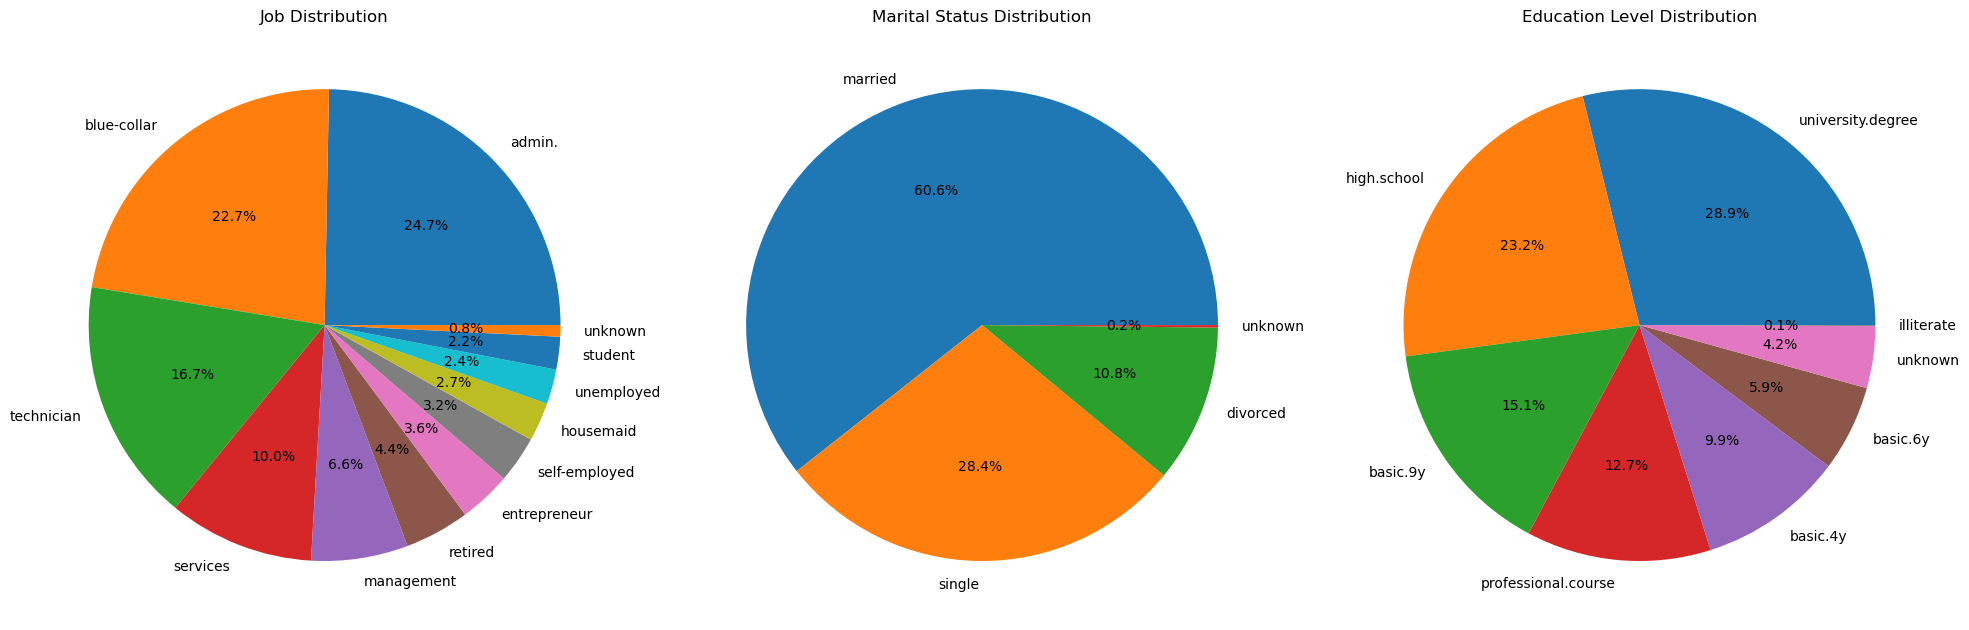

In [513]:
job_counts = df['job'].value_counts()
marital_counts = df['marital'].value_counts()
education_counts = df['education'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%')
axs[0].set_title('Job Distribution')

axs[1].pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
axs[1].set_title('Marital Status Distribution')

axs[2].pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%')
axs[2].set_title('Education Level Distribution')

plt.tight_layout()
plt.show()

The charts above shows distribution of `job`, `marital` and `education` columns.
1. Job: It is noticable that there are 3 dominant jobs which is `admin.` with 24.7%, followed by `blue-collar` with 22.7% and `technician` with 16.7%. There are also occupations with less than 5% distribution. To ease the process, I will group them as `others`. 
2. Marital: `married` status is the most significant compared to `single` and `divorced` followed by 0.2% `unknown` status.
3. Education: `university.degree` holds the highest distribution of 28.9%, followed by `high.school` by 23.2% and `basic.9y` by 15.1%. 

The reason why I change the values with less than 5% occurences to `others` is to avoid sparse matrix when using One Hot Encoding, to ensure or model will handle the data correctly. 

Source: https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0

In [514]:
def replace_under(col, percent):
    value_counts = df[col].value_counts(normalize=True) * 100 
    to_replace = value_counts[value_counts < percent].index
    df[col] = df[col].replace(to_replace, 'others') 
    return to_replace

job_replacements = replace_under('job', 5)

replacements = {
    'job': job_replacements,
}

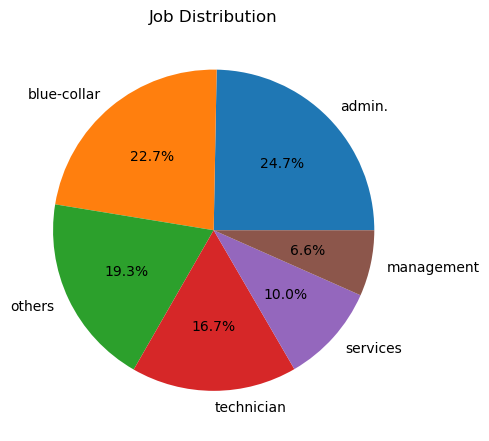

In [515]:
job_counts2 = df['job'].value_counts()

plt.figure(figsize=(5, 5)) 
plt.pie(job_counts2.values, labels=job_counts2.index, autopct='%1.1f%%')
plt.title('Job Distribution')

plt.tight_layout()
plt.show()

Save the replacement to pickle file for further process.

In [516]:
with open('job_replacement.pkl', 'wb') as f:
    pkl.dump(replacements, f)

#### **2. Distribution of `default` and target variable**

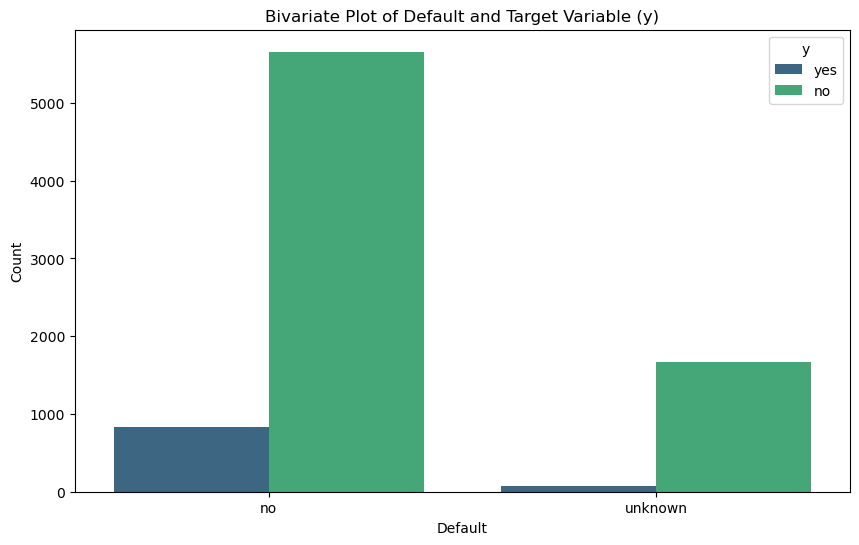

In [517]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default', hue='y', palette='viridis')
plt.title('Bivariate Plot of Default and Target Variable (y)')
plt.xlabel('Default')
plt.ylabel('Count')
plt.legend(title='y', loc='upper right')
plt.show()

In our data, we only have `no` and `unknown` from the `default` column, where it's supposed to have another value of `yes`. This might cause our model having hard time learning when it encounters new data with `yes` value during deployment and cause bias predictions to only predicting `no` and `unknown`. 

#### **3. Target variable `y`**

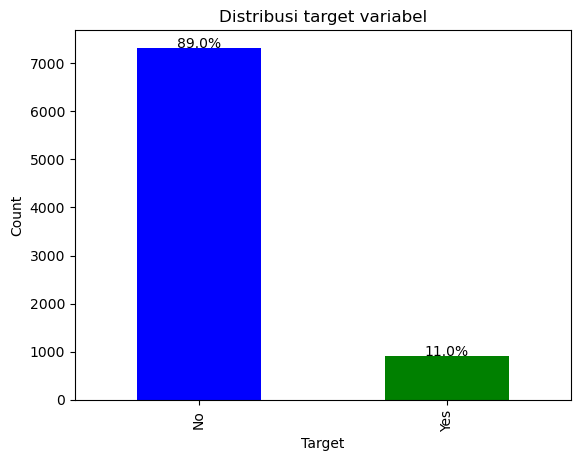

In [518]:
target_counts = df['y'].value_counts()
total = len(df['y'])

ax = target_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribusi target variabel')

for i, freq in enumerate(target_counts):
    percentage = 100 * freq / total
    ax.text(i, freq + 0.1, f'{percentage:.1f}%', ha='center')

plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Clearly there is a class imbalance in our target variable where class `no` as majority class for 89% and class `yes` as minority class for 11%. 

This problem might cause bias to our model's performance. Since class `no` is the majority class, our model will tend to predict `no` rather than `yes`, and might predict `yes` as `no`. We need to handle this to ensure our model can predict class `yes` with a good performance.

#### **4. Day and Month**

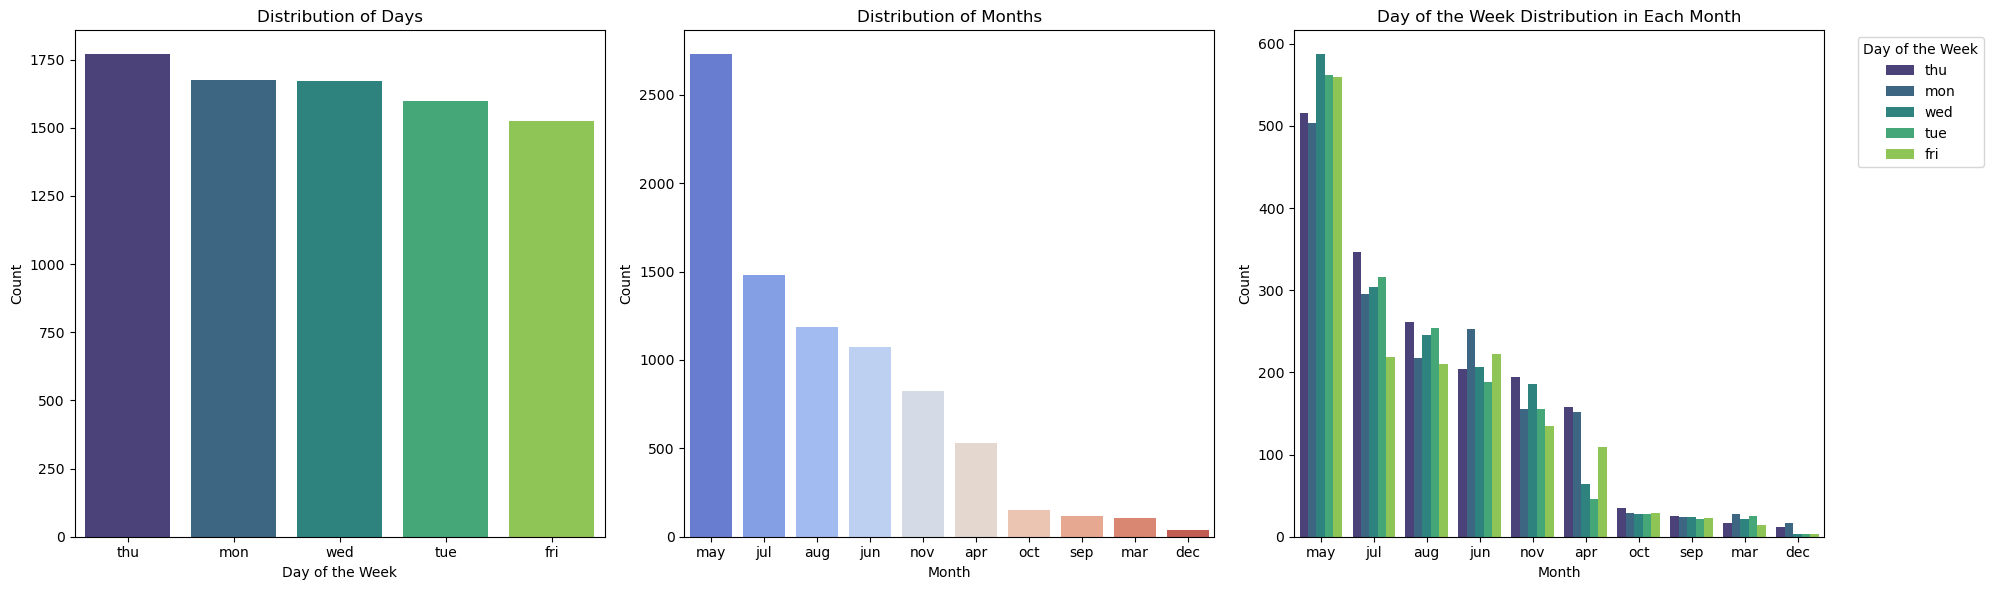

In [519]:
shared_palette = sns.color_palette('viridis', n_colors=len(df['day_of_week'].unique()))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

day_order = df['day_of_week'].value_counts().index
sns.countplot(x='day_of_week', data=df, order=day_order, palette=shared_palette, ax=axs[0])
axs[0].set_title('Distribution of Days')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Count')

month_order = df['month'].value_counts().index
sns.countplot(x='month', data=df, order=month_order, palette='coolwarm', ax=axs[1])
axs[1].set_title('Distribution of Months')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')

sns.countplot(x='month', hue='day_of_week', data=df, order=month_order, hue_order=day_order, palette=shared_palette, ax=axs[2])
axs[2].set_title('Day of the Week Distribution in Each Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Count')
axs[2].legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Plots above shows the distribution of when customers are last contacted based on days and month. With the most day is `thu`, which means most customers are last contacted on Thursdays followed by `mon` and `wed`.Customers are mostly last contacted on May followed by July. 

# **Split Data**

Dividing the data into 80% training set and 20% testing set

In [520]:
input_df = df.drop('y', axis=1)
output_df = df['y']

In [521]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [522]:
print("Shape of training set:", x_train.shape)
x_train.head()

Shape of training set: (6590, 15)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,31,blue-collar,single,basic.9y,no,yes,yes,cellular,jun,tue,103.0,1,3,2,success
5900,32,technician,married,professional.course,no,no,yes,cellular,jul,wed,183.0,1,-1,0,nonexistent
5022,47,technician,married,professional.course,no,yes,yes,cellular,aug,fri,78.0,3,-1,0,nonexistent
4556,36,admin.,single,university.degree,no,yes,no,cellular,jul,thu,10.0,3,-1,0,nonexistent
4139,45,management,married,university.degree,no,no,yes,cellular,nov,wed,391.0,2,-1,0,nonexistent


In [523]:
print("Shape of testing set:", x_test.shape)
x_test.head()

Shape of testing set: (1648, 15)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
706,46,admin.,divorced,university.degree,unknown,no,no,telephone,may,wed,93.0,1,-1,0,nonexistent
5968,35,technician,married,high.school,unknown,yes,no,cellular,jul,tue,740.0,1,-1,0,nonexistent
1665,24,services,single,high.school,no,yes,no,cellular,jul,wed,242.0,1,-1,0,nonexistent
6676,51,admin.,married,high.school,no,no,no,cellular,may,tue,40.0,4,-1,0,nonexistent
5606,36,admin.,married,high.school,no,yes,no,telephone,jul,tue,305.0,7,-1,0,nonexistent


# **Handling missing values**

In [524]:
x_train.isnull().sum()

age            0
job            5
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [525]:
x_test.isnull().sum()

age            0
job            3
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       3
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

There are missing values found in `job` and `duration`.

1. Job

`job` is a categorical variable, so imputation process is done with mode.

In [526]:
print('Mode of job :', st.mode(x_train['job']))

Mode of job : admin.


In [527]:
x_train['job'].fillna(st.mode(x_train['job']), inplace=True)
x_test['job'].fillna(st.mode(x_train['job']), inplace=True)

2. Duration

`duration` is a numerical variable, imputation process will be done with either median or mean. If outliers are present, we impute with median, otherwise, impute with mean. 

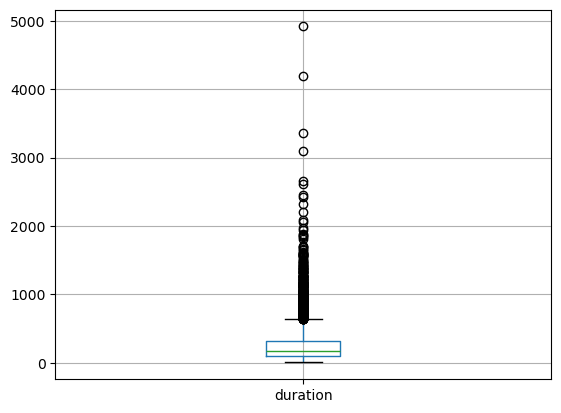

In [528]:
boxplot = x_train.boxplot(column='duration')
plt.show()

Outliers are present, impute with median.

In [529]:
print('Median of duration :', x_train['duration'].median())

Median of duration : 179.0


In [530]:
x_train['duration'].fillna(x_train['duration'].median(), inplace=True)
x_test['duration'].fillna(x_train['duration'].median(), inplace=True)

Check missing values again

In [531]:
x_train.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [532]:
x_test.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

No more missing values found in both training and testing set.

# **Feature Engineering**

### 1. Categorical (Nominal) with One Hot Encoder

Columns that are categorical and nominal, I will encode using One Hot Encoder because there is no level. I don't include `default` here because as I said above, there might be unseen data problem. 

In [533]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()

encode_train = x_train[['job', 'marital', 'education', 'housing', 'loan', 'poutcome']]
encode_test = x_test[['job', 'marital', 'education', 'housing', 'loan', 'poutcome']]

train_data = pd.DataFrame(OHE.fit_transform(encode_train).toarray(), columns = OHE.get_feature_names_out())
test_data = pd.DataFrame(OHE.transform(encode_test).toarray(), columns=OHE.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_enc = pd.concat([x_train, train_data], axis = 1)
x_test_enc = pd.concat([x_test, test_data], axis = 1)


Remove the original column, and only keeping the One Hot Encoded columns.

In [534]:
x_train_enc.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_others', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [535]:
x_train = x_train_enc[['age', 'default', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_others', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]

In [536]:
x_test = x_test_enc[['age', 'default', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_others', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]

Save the encoder inside a pickle.

In [537]:
filename = 'categorical_encode.pkl'
pkl.dump(OHE, open(filename, 'wb'))

### 2. Categorical (Ordinal) with Ordinal Encoding

In [538]:
from sklearn.preprocessing import OrdinalEncoder

In [539]:
df['month'].value_counts()

month
may    2729
jul    1481
aug    1189
jun    1074
nov     827
apr     529
oct     149
sep     117
mar     105
dec      38
Name: count, dtype: int64

`month` and `day_of_week` column are categorical and ordinal, which means there is level in the value. Encoding will be done with OrdinalEncoder from sklearn. There are also unseen values in `month`, there are no `jan` and `feb` in the original dataset. I will handle this with adding `handle_unknown` parameter to the Ordinal Encoder.

In [540]:
month_mapping = {
    'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
    'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 1
}

day_mapping = {
    'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4
}

month_encoder = OrdinalEncoder(categories=[list(month_mapping.keys())], handle_unknown='use_encoded_value', unknown_value=-1)
day_encoder = OrdinalEncoder(categories=[list(day_mapping.keys())], handle_unknown='use_encoded_value', unknown_value=-1)

x_train[['month']] = month_encoder.fit_transform(x_train[['month']])
x_train[['day_of_week']] = day_encoder.fit_transform(x_train[['day_of_week']])

x_test[['month']] = month_encoder.transform(x_test[['month']])
x_test[['day_of_week']] = day_encoder.transform(x_test[['day_of_week']])

In [541]:
x_train.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,...,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,no,cellular,5.0,1.0,103.0,1,3,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,32,no,cellular,6.0,2.0,183.0,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,47,no,cellular,7.0,4.0,78.0,3,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,36,no,cellular,6.0,3.0,10.0,3,-1,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,45,no,cellular,10.0,2.0,391.0,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Save the encoder inside a pickle.

In [542]:
filename = 'month_encoder.pkl'
pkl.dump(month_encoder, open(filename, 'wb'))

filename = 'day_encoder.pkl'
pkl.dump(day_encoder, open(filename, 'wb'))

### **3. Encode `default`**

In the data description, `default` has 3 values, `yes`, `no` and `unknown`. But, after value_counts(), this column only has `no` and `unknown`. Therefore I will use Ordinal Encoder. 

In [543]:
default_mapping = {
    'yes': 0, 'no': 1, 'unknown': 2
}

default_encoder = OrdinalEncoder(categories=[list(default_mapping.keys())], handle_unknown='use_encoded_value', unknown_value=-1)

x_train[['default']] = default_encoder.fit_transform(x_train[['default']])

x_test[['default']] = default_encoder.transform(x_test[['default']])

In [544]:
x_train.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,...,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.0,cellular,5.0,1.0,103.0,1,3,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,32,1.0,cellular,6.0,2.0,183.0,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,47,1.0,cellular,7.0,4.0,78.0,3,-1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,36,1.0,cellular,6.0,3.0,10.0,3,-1,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,45,1.0,cellular,10.0,2.0,391.0,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Save the encoder inside a pickle.

In [545]:
filename = 'default_encoder.pkl'
pkl.dump(default_mapping, open(filename, 'wb'))

### **4. Encode `contact`**

There are only 2 uniques value in this columns, so I decided to use Binary Encoding and will be done manually.

In [546]:
contact_mapping = {'contact':{'cellular':0, 'telephone':1}}

x_train = x_train.replace(contact_mapping)
x_test = x_test.replace(contact_mapping)

Save the encoder inside a pickle.

In [547]:
filename = 'contact_encoder.pkl'
pkl.dump(contact_mapping, open(filename, 'wb'))

## **Scaling**

Before scaling process, we need to identify if outliers are present to determine which scaling method is best.

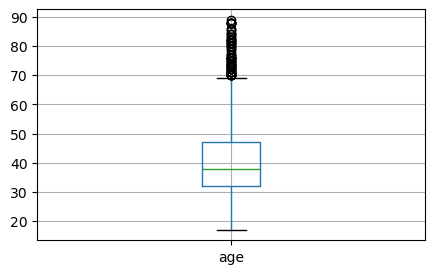

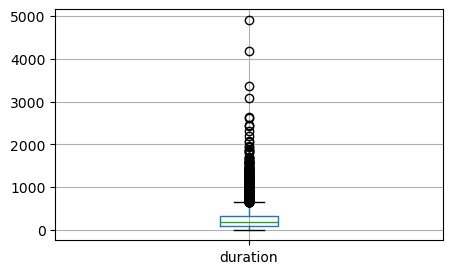

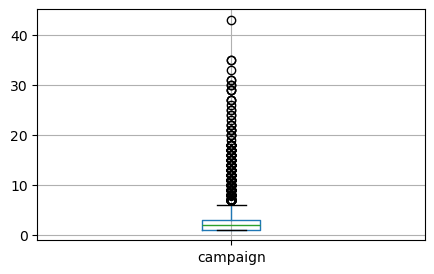

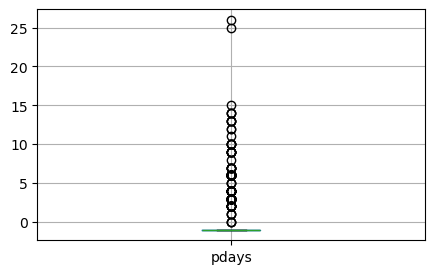

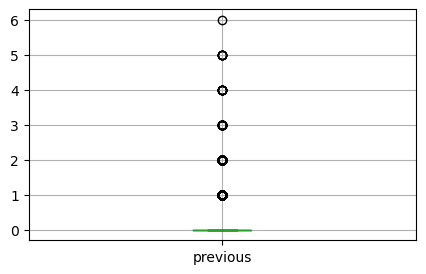

In [548]:
for i in num_cols:
    plt.figure(figsize=(5,3))
    boxplot = x_train.boxplot(column=i)
    plt.show()

Scaling will be done with using Robust Scaler because there are outliers present in all numerical variable and Robust Scaler is best when dealing with outliers.

In [549]:
from sklearn.preprocessing import RobustScaler

In [550]:
x_train.columns

Index(['age', 'default', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_others', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [551]:
num_cols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [552]:
scaler = RobustScaler()

scale_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

In [553]:
filename = 'scaler.pkl'
pkl.dump(scaler, open(filename, 'wb'))

## **Handling Class Imbalance**

On the EDA before, class imbalance has been identified. To handle this problem, I will perform **oversampling** from SMOTE. SMOTE will make synthetic data for the minority class. Oversampling is only done on the training set.

Reference : https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [554]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [555]:
print("Shape of training set before oversampling :", x_train.shape, y_train.shape)
print("Shape of training set after oversampling :", x_train_resampled.shape, y_train_resampled.shape)

Shape of training set before oversampling : (6590, 36) (6590,)
Shape of training set after oversampling : (11788, 36) (11788,)


In [556]:
y_no = (y_train=='no').sum()
y_yes = (y_train=='yes').sum()
print("Target 'no' before oversampling :", y_no)
print("Target 'yes' before oversampling :", y_yes)

len_data = len(y_train)

print("\nPercentage of Target Variable")
print("Target no:", f"{(y_no / len_data) * 100:.2f}%")
print("Target yes:", f"{(y_yes / len_data) * 100:.2f}%")

y_no_res = (y_train_resampled=='no').sum()
y_yes_res = (y_train_resampled=='yes').sum()
print("\nTarget 'no' after oversampling :", y_no_res)
print("Target 'yes' after oversampling :", y_yes_res)

len_data_res = len(y_train_resampled)

print("\nPercentage of Target Variable")
print("Target no :", f"{(y_no_res/len_data_res)*100}%")
print("Target yes :", f"{(y_yes_res/len_data_res)*100}%")

Target 'no' before oversampling : 5894
Target 'yes' before oversampling : 696

Percentage of Target Variable
Target no: 89.44%
Target yes: 10.56%

Target 'no' after oversampling : 5894
Target 'yes' after oversampling : 5894

Percentage of Target Variable
Target no : 50.0%
Target yes : 50.0%


Previously, class imbalance is clearly noticable where class `no` as the majority class and class `yes` as the minority class. After performing oversampling, class `no` and `yes` is now balanced.

# **Modelling**

In [557]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

Make a new table to store each model's performance and Confusion Matrix result.

In [558]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision yes', 'Precision no', 'Recall yes', 'Recall no', 'F1-Score yes', 'F1-Score no'])
cm_results = pd.DataFrame(columns=['Model Name', 'False Positives', 'False Negatives'])

### **1. Logistic Regression**

In [559]:
LR = LogisticRegression()
LR.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [560]:
y_pred_LR = LR.predict(x_test)

In [561]:
print('\nClassification Report MODEL 1 : Logistic Regression\n')
print(classification_report(y_test, y_pred_LR, target_names=['no','yes']))


Classification Report MODEL 1 : Logistic Regression

              precision    recall  f1-score   support

          no       0.95      0.84      0.89      1435
         yes       0.40      0.72      0.51       213

    accuracy                           0.82      1648
   macro avg       0.68      0.78      0.70      1648
weighted avg       0.88      0.82      0.84      1648



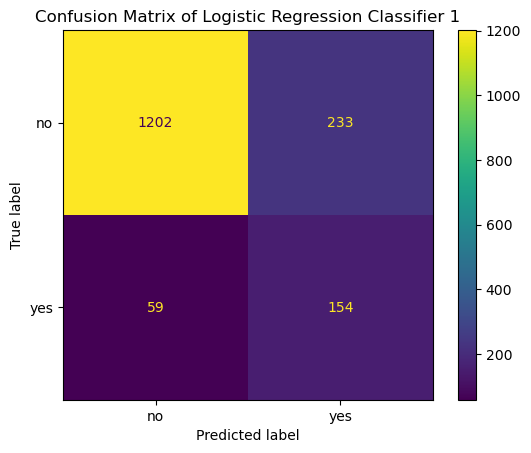

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59


In [562]:
cm_matrix = confusion_matrix(y_test, y_pred_LR)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier 1")
plt.show()

cm_result = ['Logistic Regression 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [563]:
precision_yes = precision_score(y_test, y_pred_LR, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_LR, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_LR, pos_label='yes')
precision_no = precision_score(y_test, y_pred_LR, pos_label='no')
recall_no = recall_score(y_test, y_pred_LR, pos_label='no')
f1_no = f1_score(y_test, y_pred_LR, pos_label='no')

model_result = ['Logistic Regression 1', accuracy_score(y_test, y_pred_LR), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691


#### **Tuning Logistic Regression**

In [564]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],             
    'solver': ['liblinear']            
}

LogReg2 = LogisticRegression(max_iter = 1000)

LogReg2 = GridSearchCV(LogReg2,
                       param_grid = param_grid,
                       scoring = 'accuracy',
                       cv = 5)

LogReg2.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [565]:
print("Hyperparameters to use after using GridSearchCV :")
print(LogReg2.best_estimator_)

Hyperparameters to use after using GridSearchCV :
LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')


In [566]:
LR2 = LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')
LR2.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

In [567]:
y_pred_LR2 = LR2.predict(x_test)

In [568]:
print('\nClassification Report MODEL 1.2 : Logistic Regression (Tuned)\n')
print(classification_report(y_test, y_pred_LR2, target_names=['no','yes']))


Classification Report MODEL 1.2 : Logistic Regression (Tuned)

              precision    recall  f1-score   support

          no       0.95      0.84      0.89      1435
         yes       0.40      0.72      0.51       213

    accuracy                           0.82      1648
   macro avg       0.68      0.78      0.70      1648
weighted avg       0.88      0.82      0.84      1648



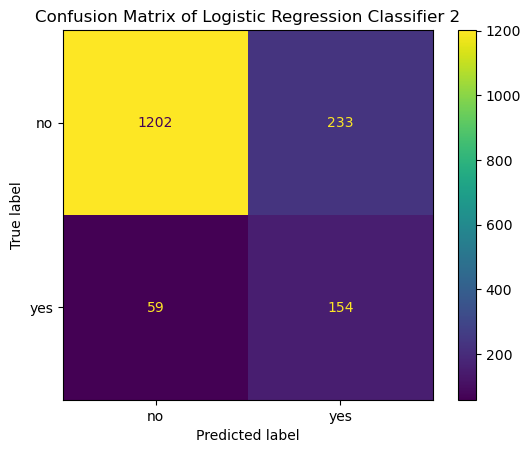

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59


In [569]:
cm_matrix = confusion_matrix(y_test, y_pred_LR2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier 2")
plt.show()

cm_result = ['Logistic Regression 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [570]:
precision_yes = precision_score(y_test, y_pred_LR2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_LR2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_LR2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_LR2, pos_label='no')
recall_no = recall_score(y_test, y_pred_LR2, pos_label='no')
f1_no = f1_score(y_test, y_pred_LR2, pos_label='no')

model_result = ['Logistic Regression 2', accuracy_score(y_test, y_pred_LR2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691


### **2. Random Forest**

In [571]:
RF = RandomForestClassifier()
RF.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [572]:
y_pred_RF = RF.predict(x_test)

In [573]:
print('\nClassification Report MODEL 2 : Random Forest\n')
print(classification_report(y_test, y_pred_RF, target_names=['no','yes']))


Classification Report MODEL 2 : Random Forest

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1435
         yes       0.60      0.41      0.49       213

    accuracy                           0.89      1648
   macro avg       0.76      0.69      0.71      1648
weighted avg       0.88      0.89      0.88      1648



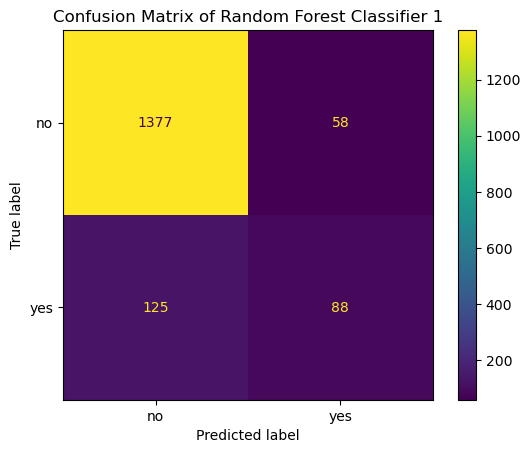

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59
2,Random Forest 1,58,125


In [574]:
cm_matrix = confusion_matrix(y_test, y_pred_RF)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier 1")
plt.show()

cm_result = ['Random Forest 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [575]:
precision_yes = precision_score(y_test, y_pred_RF, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_RF, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_RF, pos_label='yes')
precision_no = precision_score(y_test, y_pred_RF, pos_label='no')
recall_no = recall_score(y_test, y_pred_RF, pos_label='no')
f1_no = f1_score(y_test, y_pred_RF, pos_label='no')

model_result = ['Random Forest 1', accuracy_score(y_test, y_pred_RF), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
2,Random Forest 1,0.888956,0.602740,0.916778,0.413146,0.959582,0.490251,0.937692


#### **Tuning Random Forest**

In [576]:
param_grid = {
    'n_estimators': [1, 10],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]               
}

RF_grid = RandomForestClassifier()

RF_grid = GridSearchCV(RF_grid, 
                       param_grid=param_grid, 
                       cv=5,
                       scoring='accuracy')

RF_grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [1, 10]},
             scoring='accuracy')

In [577]:
print("Hyperparameters to use after using GridSearchCV :")
print(RF_grid.best_estimator_)

Hyperparameters to use after using GridSearchCV :
RandomForestClassifier(min_samples_leaf=2, n_estimators=10)


In [578]:
RF2 = RandomForestClassifier(n_estimators=10)
RF2.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=10)

In [579]:
y_pred_RF2 = RF2.predict(x_test)

In [580]:
from sklearn.metrics import classification_report
print('\nClassification Report MODEL 2.2 : Random Forest (Tuned)\n')
print(classification_report(y_test, y_pred_RF2, target_names=['no','yes']))


Classification Report MODEL 2.2 : Random Forest (Tuned)

              precision    recall  f1-score   support

          no       0.91      0.96      0.94      1435
         yes       0.59      0.34      0.43       213

    accuracy                           0.88      1648
   macro avg       0.75      0.65      0.68      1648
weighted avg       0.87      0.88      0.87      1648



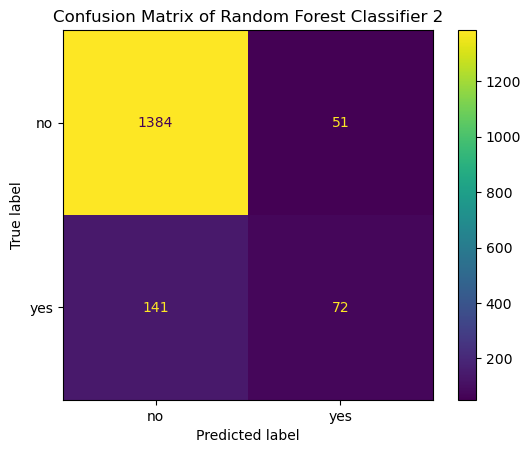

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59
2,Random Forest 1,58,125
3,Random Forest 2,51,141


In [581]:
cm_matrix = confusion_matrix(y_test, y_pred_RF2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier 2")
plt.show()

cm_result = ['Random Forest 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [582]:
precision_yes = precision_score(y_test, y_pred_RF2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_RF2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_RF2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_RF2, pos_label='no')
recall_no = recall_score(y_test, y_pred_RF2, pos_label='no')
f1_no = f1_score(y_test, y_pred_RF2, pos_label='no')

model_result = ['Random Forest 2', accuracy_score(y_test, y_pred_RF2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
2,Random Forest 1,0.888956,0.602740,0.916778,0.413146,0.959582,0.490251,0.937692
3,Random Forest 2,0.883495,0.585366,0.907541,0.338028,0.964460,0.428571,0.935135


### **3. SVM**

In [583]:
svm = SVC()
svm.fit(x_train_resampled, y_train_resampled)

SVC()

In [584]:
y_pred_svm = svm.predict(x_test)

In [585]:
print('\nClassification Report MODEL 3 : SVM\n')
print(classification_report(y_test, y_pred_svm, target_names=['no','yes']))


Classification Report MODEL 3 : SVM

              precision    recall  f1-score   support

          no       0.95      0.84      0.89      1435
         yes       0.40      0.73      0.52       213

    accuracy                           0.82      1648
   macro avg       0.68      0.78      0.70      1648
weighted avg       0.88      0.82      0.84      1648



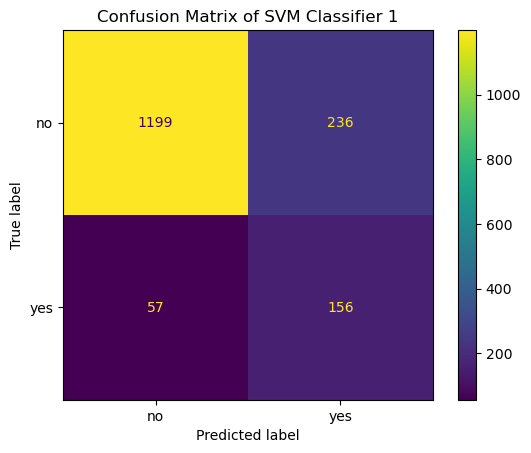

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59
2,Random Forest 1,58,125
3,Random Forest 2,51,141
4,SVM 1,236,57


In [586]:
cm_matrix = confusion_matrix(y_test, y_pred_svm)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of SVM Classifier 1")
plt.show()

cm_result = ['SVM 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [587]:
precision_yes = precision_score(y_test, y_pred_svm, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_svm, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_svm, pos_label='yes')
precision_no = precision_score(y_test, y_pred_svm, pos_label='no')
recall_no = recall_score(y_test, y_pred_svm, pos_label='no')
f1_no = f1_score(y_test, y_pred_svm, pos_label='no')

model_result = ['SVM 1', accuracy_score(y_test, y_pred_svm), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
2,Random Forest 1,0.888956,0.602740,0.916778,0.413146,0.959582,0.490251,0.937692
3,Random Forest 2,0.883495,0.585366,0.907541,0.338028,0.964460,0.428571,0.935135
4,SVM 1,0.822209,0.397959,0.954618,0.732394,0.835540,0.515702,0.891119


#### **Tuning SVM**

In [588]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [0.1, 0.01]
}

svm_grid = SVC()
svm_grid = GridSearchCV(svm_grid, 
                       param_grid=param_grid, 
                       cv=5,
                       scoring='accuracy')

svm_grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01]},
             scoring='accuracy')

In [589]:
print("Hyperparameters to use after using GridSearchCV :")
print(svm_grid.best_estimator_)

Hyperparameters to use after using GridSearchCV :
SVC(C=1, gamma=0.1)


In [590]:
SVM2 = SVC(C=1, gamma=0.1)
SVM2.fit(x_train_resampled, y_train_resampled)

SVC(C=1, gamma=0.1)

In [591]:
y_pred_svm2 = SVM2.predict(x_test)

In [592]:
print('\nClassification Report MODEL 3.2 : SVM (Tuned)\n')
print(classification_report(y_test, y_pred_svm2, target_names=['no','yes']))


Classification Report MODEL 3.2 : SVM (Tuned)

              precision    recall  f1-score   support

          no       0.94      0.88      0.91      1435
         yes       0.42      0.59      0.49       213

    accuracy                           0.84      1648
   macro avg       0.68      0.74      0.70      1648
weighted avg       0.87      0.84      0.85      1648



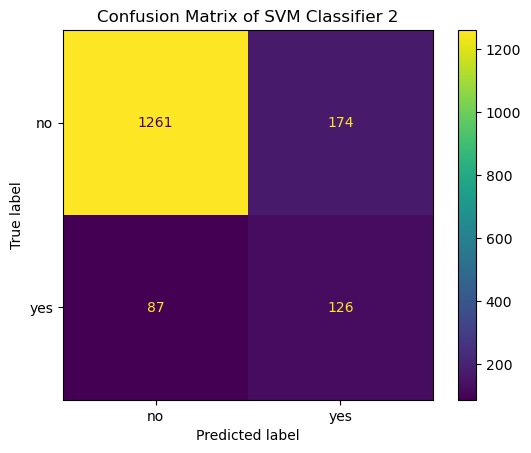

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59
2,Random Forest 1,58,125
3,Random Forest 2,51,141
4,SVM 1,236,57
5,SVM 2,174,87


In [593]:
cm_matrix = confusion_matrix(y_test, y_pred_svm2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of SVM Classifier 2")
plt.show()

cm_result = ['SVM 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [594]:
precision_yes = precision_score(y_test, y_pred_svm2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_svm2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_svm2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_svm2, pos_label='no')
recall_no = recall_score(y_test, y_pred_svm2, pos_label='no')
f1_no = f1_score(y_test, y_pred_svm2, pos_label='no')

model_result = ['SVM 2', accuracy_score(y_test, y_pred_svm2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
2,Random Forest 1,0.888956,0.602740,0.916778,0.413146,0.959582,0.490251,0.937692
3,Random Forest 2,0.883495,0.585366,0.907541,0.338028,0.964460,0.428571,0.935135
4,SVM 1,0.822209,0.397959,0.954618,0.732394,0.835540,0.515702,0.891119
5,SVM 2,0.841626,0.420000,0.935460,0.591549,0.878746,0.491228,0.906216


### **4. Stacking using Random Forest and SVM**

In [595]:
from sklearn.preprocessing import StandardScaler

In [596]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
]

stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [597]:
y_pred_stack = stacking_class.predict(x_test)

In [598]:
print('\nClassification Report MODEL 4 : Stacking\n')
print(classification_report(y_test, y_pred_stack, target_names=['no','yes']))


Classification Report MODEL 4 : Stacking

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      1435
         yes       0.73      0.38      0.50       213

    accuracy                           0.90      1648
   macro avg       0.82      0.68      0.72      1648
weighted avg       0.89      0.90      0.89      1648



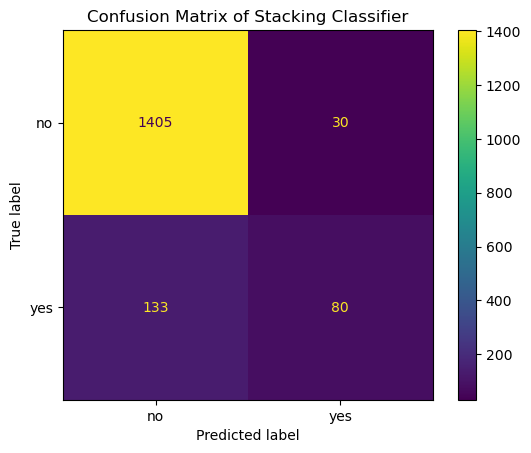

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,233,59
1,Logistic Regression 2,233,59
2,Random Forest 1,58,125
3,Random Forest 2,51,141
4,SVM 1,236,57
5,SVM 2,174,87
6,Stacking,30,133


In [599]:
cm_matrix = confusion_matrix(y_test, y_pred_stack)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Stacking Classifier")
plt.show()

cm_result = ['Stacking', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [600]:
precision_yes = precision_score(y_test, y_pred_stack, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_stack, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_stack, pos_label='yes')
precision_no = precision_score(y_test, y_pred_stack, pos_label='no')
recall_no = recall_score(y_test, y_pred_stack, pos_label='no')
f1_no = f1_score(y_test, y_pred_stack, pos_label='no')

model_result = ['Stacking', accuracy_score(y_test, y_pred_stack), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
1,Logistic Regression 2,0.822816,0.397933,0.953212,0.723005,0.837631,0.513333,0.891691
2,Random Forest 1,0.888956,0.602740,0.916778,0.413146,0.959582,0.490251,0.937692
3,Random Forest 2,0.883495,0.585366,0.907541,0.338028,0.964460,0.428571,0.935135
4,SVM 1,0.822209,0.397959,0.954618,0.732394,0.835540,0.515702,0.891119
5,SVM 2,0.841626,0.420000,0.935460,0.591549,0.878746,0.491228,0.906216
6,Stacking,0.901092,0.727273,0.913524,0.375587,0.979094,0.495356,0.945173


Our data experience class imbalance, therefore we cannot depend on the accuracy alone because high accuracy is achieved because majority data is on class `no`. It is better to look at F1-score when class imbalance are present. 

Precision yes: shows how accurate our model predicts which customer that truly done deposit. Low precision means there are alot of false positives (predicted yes, when it's actually no)

Recall yes: shows how many of the total customers who actually made deposits were predicted correctly by the model. Low recall means there are alot of false negatives (predicted no, when it's actually yes)

F1-score yes: combined metric of precision and recall. 

Model SVM 1 (before tuning) shows the best performance. F1-score of class yes is the highest among other models. In this problem we need to aim for lower false positives, which means we need to have higher recall, whcih this model have the highest recall of class yes. 

This problem aims to find which customer will deposit to the bank requiring low false negatives to ensure no revenue are wasted. It's better to add more resource power for campaign rather than losing revenue. 

# **Pickle Best Model**

In [601]:
filename = 'SVM_model.pkl'
pkl.dump(svm, open(filename, 'wb'))